# Local Outlier Factor: LOF

In this notebook we explore the using of LOF for anomaly detection. For this purpose, we will use the following procedure:

1. We use the public test set for the training process. We randomly select 80% of the non-contaminated data for training, and the remaining 20% + contaminated data is used for validation.
2. The performance of the model was measured over the private test set.

We perform cross-validation to select the hyperparameter "n_neighbors", which defines the number of neighbors for the knn queries.

In [1]:
from sklearn.metrics import f1_score
from sklearn.neighbors import LocalOutlierFactor

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
public_test = pd.read_pickle('public_test_data.pkl')
public_test = public_test.replace([np.inf, -np.inf], np.nan)
public_test = public_test.fillna(-999)

x_data = public_test.drop(['hierClass', 'classALeRCE', 'challenge_oid', 'outClass', 'outType'], axis=1).values
y_data = public_test.outClass

In [8]:
def split_data(x_data, y_data):
    x_non_contaminated = x_data[y_data=='Inlier']
    y_non_contaminated = y_data[y_data=='Inlier'].values
    selected_ixs = np.random.choice(x_non_contaminated.shape[0], 
                                int(x_non_contaminated.shape[0]*0.2), replace=False)
    
    x_selected_test = x_non_contaminated[[selected_ixs]]
    y_selected_test = y_non_contaminated[[selected_ixs]]
    
    x_non_contaminated = np.delete(x_non_contaminated, selected_ixs, axis=0)    
    
    x_contaminated = x_data[y_data=='Outlier']
    y_contaminated = y_data[y_data=='Outlier'].values
    x_contaminated = np.concatenate((x_contaminated, x_selected_test), axis=0)
    y_contaminated = np.concatenate((y_contaminated, y_selected_test), axis=0)
    y_contaminated[y_contaminated=='Inlier']=1
    y_contaminated[y_contaminated=='Outlier']=-1
    
    return x_non_contaminated, x_contaminated, y_contaminated.astype('int')

In [9]:
neighbors = [5, 10, 20, 30]

mean_f1 = []
std_f1 = []
for neighbor in neighbors:
    f1s = []
    for rep in range(5):
        x_train, x_test, y_test = split_data(x_data, y_data)
        clf = clf = LocalOutlierFactor(n_neighbors=neighbor, novelty=True, contamination=0.001).fit(x_train)
        y_pred =  clf.predict(x_test)
        f1 = f1_score(y_test, y_pred, average='binary')
        f1s.append(f1)
        print('The f1-score for LOF using n_neighbor={} is {}'.format(neighbor, f1*100))
    mean_f1.append(np.mean(f1s))
    std_f1.append(np.std(f1s))

The f1-score for LOF using n_neighbor=5 is 90.85184960949326
The f1-score for LOF using n_neighbor=5 is 90.81218581551693
The f1-score for LOF using n_neighbor=5 is 90.85184960949326
The f1-score for LOF using n_neighbor=5 is 90.77687553023877
The f1-score for LOF using n_neighbor=5 is 90.85184960949326
The f1-score for LOF using n_neighbor=10 is 90.85735044805037
The f1-score for LOF using n_neighbor=10 is 90.85074174992431
The f1-score for LOF using n_neighbor=10 is 90.8298001211387
The f1-score for LOF using n_neighbor=10 is 90.85624318759841
The f1-score for LOF using n_neighbor=10 is 90.8639583459466
The f1-score for LOF using n_neighbor=20 is 90.85074174992431
The f1-score for LOF using n_neighbor=20 is 90.86945991765562
The f1-score for LOF using n_neighbor=20 is 90.86285195277021
The f1-score for LOF using n_neighbor=20 is 90.86285195277021
The f1-score for LOF using n_neighbor=20 is 90.8298001211387
The f1-score for LOF using n_neighbor=30 is 90.86945991765562
The f1-score for

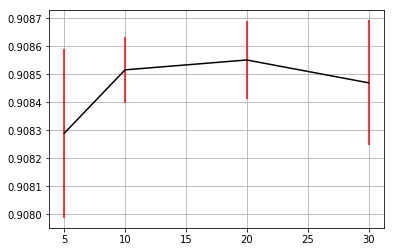

In [11]:
plt.errorbar(neighbors, mean_f1, yerr=std_f1, color='k', ecolor='r')
plt.grid()
plt.show()

## Using neighbors=20: 

In [3]:
train = pd.read_pickle('train_data.pkl')
train = train[(train['n_det_1']>=10) & (train['n_det_2']>=10)]
train = train[train.hierClass=='Periodic']

importances = np.load('importances.npy').item()
x_train = train[importances['periodic_importance']]

x_train[np.isnan(x_train)] = -999

clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.001).fit(x_train)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/pandas/core/frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [4]:
test = pd.read_pickle('test_data.pkl')
test = test[(test['n_det_1']>=10) & (test['n_det_2']>=10)]
test = test[test.hierClass=='Periodic']

x_test = test[importances['periodic_importance']]

x_test[np.isnan(x_test)] = -999

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/pandas/core/frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [5]:
x_in = x_test[test.outClass=='Inlier']
x_out = x_test[test.outClass=='Outlier']

x_ELL = x_test[test.classALeRCE == 'ELL']

In [6]:
scores_in =  clf.score_samples(x_in)
scores_out =  clf.score_samples(x_out)

scores_ELL = clf.score_samples(x_ELL)

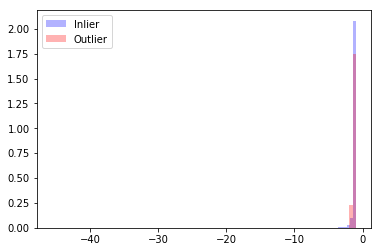

In [14]:
plt.hist(scores_in, bins=100, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_out, bins=2, color='r', alpha=0.3, density=True, label='Outlier')
plt.legend()